In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

In [4]:

!git config --global user.email "ghayalyash@gmail.com"
!git config --global user.name "yashghayal"

!git push -u origin main


error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/yashghayal/Numbers-recognition-with-MNIST-DATASET-using-CNN-and-Keras.git'


In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


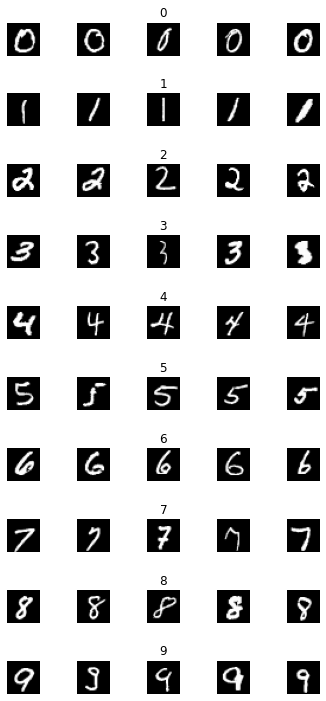

In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


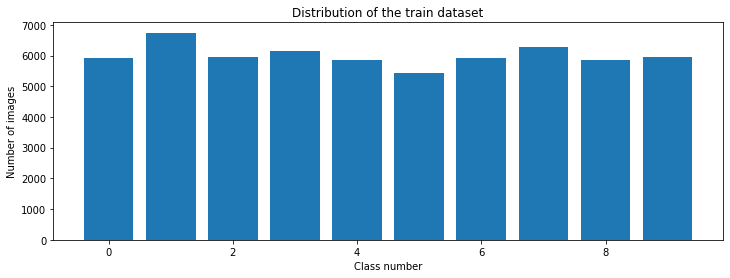

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 


X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [ ]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape = (28,28,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(15, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [ ]:
h = model.fit(X_train, y_train, epochs = 10, batch_size = 400, verbose = 1, shuffle = 1, validation_split = 0.1)

Epoch 1/10
135/135 [==============================] - 34s 10ms/step - loss: 0.5495 - accuracy: 0.8222 - val_loss: 0.0666 - val_accuracy: 0.9807
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0818 - accuracy: 0.9748 - val_loss: 0.0369 - val_accuracy: 0.9897
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0530 - accuracy: 0.9830 - val_loss: 0.0468 - val_accuracy: 0.9865
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0393 - val_accuracy: 0.9890
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoc

Text(0.5, 0, 'epoch')

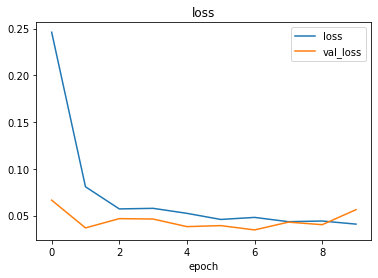

In [ ]:
plt.subplots()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')  

Text(0.5, 0, 'epoch')

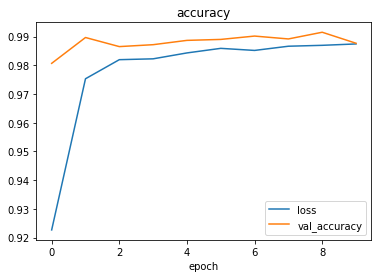

In [ ]:


plt.subplots()
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['loss', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch') 

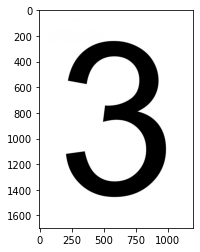

In [ ]:
import requests
from PIL import Image


url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.subplots()
plt.imshow(img)


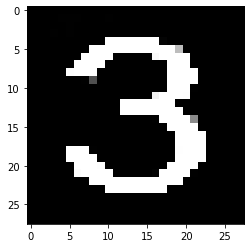

In [ ]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.subplots()
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [ ]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [ ]:
prediction = model.predict_classes(img)
print("predicted digit is", str(prediction))

predicted digit is [3]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score is ', score[0])
print('accuracy is ', score[1])

<class 'list'>
Test score is  0.04584575816988945
accuracy is  0.9882000088691711


In [ ]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[1].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 12, 12, 30)
(1, 10, 10, 15)


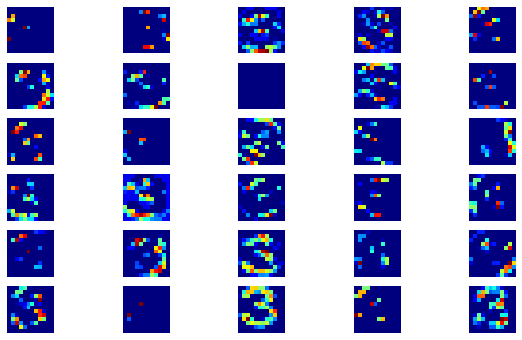

In [ ]:
plt.figure(figsize = (10,6))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')


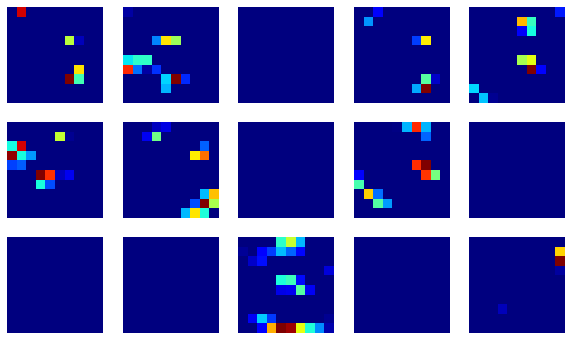

In [ ]:
plt.figure(figsize = (10,6))
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')